# Pre-Processing Dataset

Here I generate the `gal_fname1` which cointains the columns needed to this study: `Mr, R, R/R200, v_los, v_circ, orbital, infall, interloper`.


In [1]:
from file_loc import FileLocs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.fits import getdata
import astropy.table as Table
import astropy.io.ascii as at

# Reading Initial Data

In [3]:
fl = FileLocs()
galaxy_file = fl.gal_fname0
cluster_file= fl.cls_fname

In [4]:
print('--------Initial Files-------')
print('Cluster File : %s'%cluster_file)
print('Galaxy File : %s'%galaxy_file)
print()

--------Initial Files-------
Cluster File : ../data/groupCatalog_Yang_deCarvalho2017.csv
Galaxy File : ../data/groups_deCarvalho2017_galaxies_final_flag_johnnyheq.csv



In [5]:
# load catalogs
cat = at.read(cluster_file)
gal0= at.read(galaxy_file)

In [6]:
cat

Yang,RA,DEC,z,logM200,R200,N200
int64,float64,float64,float64,float64,float64,int64
2,240.5602,16.1113,0.036,15.29,2.01,525
4,247.1149,40.8317,0.03,14.66,1.24,217
5,247.1633,39.4674,0.03,14.81,1.4,277
6,167.6936,28.5374,0.033,14.6,1.18,167
7,351.1194,14.6251,0.042,14.51,1.1,106
8,239.5372,27.3133,0.09,15.1,1.71,183
9,241.5673,18.1483,0.038,14.48,1.08,143
10,223.2712,16.724,0.045,14.22,0.89,106
11,10.4693,-9.3997,0.056,14.96,1.55,156


In [7]:
gal0

Yang,objid,specobjid,distance,ra,dec,mr_petro,mu,mg,mr,mi,mz,mu_Err,mg_err,mr_err,mi_err,mz_err,photo_z,photo_zErr,z,zErr,fracDeV_i,bpt,mass,mass_p16,mass_p84,sfr,sfr_p16,sfr_p84,ssfr,ssfr_p16,ssfr_p84,mass_fire,mass_fire_p16,mass_fire_p84,age_fire,age_fire_p16,age_fire_p84,score
int64,int64,str20,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,1237665371723530461,2476009810579974144,136.414517532881,241.096046201536,18.3265225117837,16.04115,18.25859,16.53461,15.80616,15.45665,15.1811,0.02438663,0.004008314,0.003193695,0.003275148,0.00645624,0.037943,0.014221,0.03623576,9.027653e-06,1.0,5,10.17757,10.07869,10.27127,-1.181167,-2.531329,-0.5418066,-11.39744,-12.72209,-10.7545,19890480000.0,19743920000.0,21502640000.0,11076720000.0,6978492000.0,12026300000.0,0.844974
2,1237665371723595947,2476012009603229696,136.367342681583,241.143191969945,18.3148193118128,16.56684,17.88546,16.78333,16.39674,16.14023,15.96136,0.02004988,0.004686815,0.0042966,0.004817891,0.0125057,0.046597,0.009936,0.03605689,8.546705e-06,0.0,1,9.505026,9.440042,9.597365,-0.1663915,-0.3841946,0.1018986,-9.73402,-9.971323,-9.456313,1589293000.0,1054919000.0,1929349000.0,3230117000.0,1780746000.0,4379619000.0,0.8677931
2,1237665371723661557,2477083489036429312,135.738834222632,241.298564879647,18.26084584558,17.48854,19.75721,18.21501,17.37634,16.95171,16.6381,0.0609615,0.008713962,0.005935783,0.006074779,0.01416315,0.117663,0.021792,0.1065375,2.452199e-05,0.4905942,2,10.58861,10.49308,10.68633,-0.07285602,-0.5421439,0.2960085,-10.72217,-11.2,-10.334,37374590000.0,24188360000.0,49324600000.0,8078016000.0,4779446000.0,10227080000.0,0.856566
2,1237665371723726943,2477091735373637632,136.204195492075,241.500714989588,18.1959346410688,14.40143,16.72425,15.12271,14.26843,13.88404,13.59021,0.01797498,0.003051039,0.002401314,0.002479229,0.004752234,0.036194,0.010616,0.03718847,1.854586e-05,0.400819,5,10.79387,10.69631,10.88595,-0.7252186,-2.106907,-0.05099606,-11.5792,-12.95303,-10.87768,14562390000.0,14473980000.0,15976950000.0,13825520000.0,12975890000.0,14975030000.0,0.8468127
2,1237665428645085494,2443277629650921472,141.648283498985,239.665108360765,18.311863920805,17.64599,19.57185,18.18483,17.56555,17.28051,17.04145,0.08495879,0.01107894,0.008762628,0.01043138,0.03185492,0.069368,0.037342,0.0,0.0,0.08451807,-1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.8846375
2,1237665428645085509,2443273231604410368,142.108600674757,239.700039193615,18.3327358849573,16.03187,17.29356,16.24436,15.8876,15.72302,15.63917,0.02636599,0.01999441,0.005561439,0.00716093,0.02375655,0.015535,0.007041,0.0,0.0,0.06815027,-1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.8846375
2,1237665428645150969,2445455493263550464,136.235416431339,239.714265155365,18.233198906732,17.00282,18.47984,17.30875,16.87674,16.5741,16.4096,0.03409081,0.005841358,0.005608649,0.006412149,0.01964824,0.069309,0.014935,0.09906808,7.751081e-06,0.1629558,1,10.24621,10.18397,10.32692,0.627578,0.3766055,0.9204919,-9.670296,-9.927934,-9.366477,19043320000.0,12467120000.0,25619520000.0,7278363000.0,5229251000.0,10277060000.0,0.9000694
2,1237665428645150974,2443278179406735360,138.495655496531,239.745569870208,18.2844451696677,17.70032,20.32653,18.64023,17.54822,17.09917,16.85081,0.1023477,0.01119867,0.006973246,0.006971705,0.01846225,0.200357,0.025103,0.0,0.0,1.0,-1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.9000694
2,1237665428645151064,null,136.209172268962,239.826957800233,18.2706967399964,17.71142,20.89395,18.87349,17.53145,17.02316,16.67945,0.1895025,0.

# Mask Data

In [8]:
mask = gal0['z']>0.
mask&= (gal0['mass']>0)
mask&= (gal0['sfr']>-99)

Nsize = np.count_nonzero(mask)

print('Masking Galaxies with no redshift or mass estimations')
print('New Size: %i'%(Nsize))
print('fraction: %.2f'%(1.*Nsize/len(gal0)))

Masking Galaxies with no redshift or mass estimations
New Size: 74727
fraction: 0.81


In [9]:
gal = gal0[mask].copy()

In [10]:
def get_percentile_curve(x,y,alpha=5,Npoints=15):
    xbins  = np.percentile(x,np.linspace(0,100,Npoints))
    indices= [(x>=xl)&(x<xh) for xl, xh in zip(xbins[:-1],xbins[1:])]
    ycurve = np.array([np.percentile(y[idx],alpha) for idx in indices])
    return ycurve, 0.5*(xbins[1:]+xbins[:-1])

In [11]:
mass        = np.array(gal['mass'])
zgal        = np.array(gal['z'])
zmask       = (zgal>=0.025)&(zgal<=0.105)
ylow, zbins = get_percentile_curve(zgal[zmask],mass[zmask],Npoints=16)

## Magnitude Limit
---------------------------------------

Definit the mass limit of the study

In [12]:
mass = 10**np.array(gal['mass'])
z    = np.array(gal['z'])

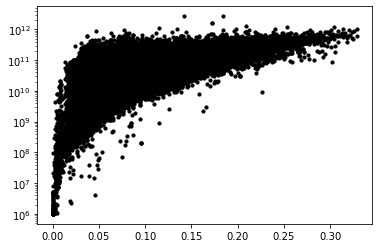

In [13]:
plt.scatter(z,mass,s=10,c='k')
plt.yscale('log')

In [14]:
zlim = (z>0.09)&(z<=0.1)
mass_lim_th = np.log10(np.percentile(mass[zlim],5))
print('Log Stellar Mass Lim: %.3f'%mass_lim_th)

Log Stellar Mass Lim: 10.056


(70000000.0, 900000000000.0)

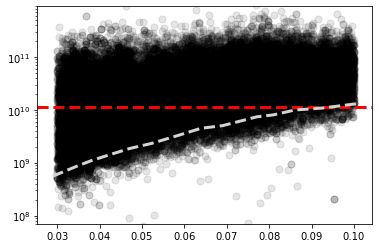

In [15]:
zmask = (z>0.03)&(z<0.1)
plt.scatter(z[zmask],mass[zmask],s=50,alpha=0.1,color='k')
plt.axhline(10**mass_lim_th,ls='--',lw=3,color='r')
plt.plot(zbins,10**ylow ,ls='--',lw=3,color='lightgray')
plt.yscale('log')
plt.ylim(7e7,9e11)

In [105]:
mass_lim = np.interp(gal0['z'],zbins,ylow)
mass_mask = gal0['mass']>=mass_lim
# mass_mask = gal0['mass']>=mass_lim_th
gal = gal0[mask&mass_mask].copy()

In [106]:
# plt.scatter(gal0['z'],10**gal0['mass'],s=10,c='lightgray',alpha=0.3)
# plt.scatter(gal['z'],10**gal['mass'],s=10,c='k')
# plt.plot(zbins,10**ylow ,ls='--',lw=3,color='r')
# plt.xlim(0.025,0.105)
# plt.yscale('log')

# Computing new variables
---------------------------------------


In [107]:
import esutil
gcid = np.array(gal['Yang'])
cid  = np.array(cat['Yang'])

key = esutil.numpy_util.match(cid,gcid)

In [108]:
gal['row']      = np.where(mask&mass_mask)[0]
gal['redshift'] = np.zeros(len(gal))
gal['redshift'][key[1]] = cat['z'][key[0]]

gal['M200']    = np.zeros(len(gal))
gal['M200'][key[1]] = cat['logM200'][key[0]]

gal['R200']    = 99.*np.ones(len(gal))
gal['R200'][key[1]] = cat['R200'][key[0]]

## Distance From The Center
---------------------------------------

To have the phase space we need first to compute the distance from the center, $R/R_{200}$.

In [109]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from astropy.constants import G, c

cosmo = FlatLambdaCDM(H0=70, Om0=0.283)
Msol = 1.98847e33
Mpc2cm = 3.086e+24
rad2deg= 180/np.pi
h=0.7
c_kms = c.value/1000

def AngularDistance(z):
    DA = float( (cosmo.luminosity_distance(z)/(1+z)**2)/u.Mpc ) # in Mpc
    return DA
AngularDistance = np.vectorize(AngularDistance)

#--- Critical universe density
def rhoc(z):
    try:
        rho_c = float(cosmo.critical_density(z)/(u.g/u.cm**3)) # in g/cm**3
    except:
        rho_c = [float(cosmo.critical_density(zi)/(u.g/u.cm**3)) for zi in z]
        rho_c = np.array(rho_c)
    
    rho_c = rho_c*(Mpc2cm**3)/Msol # in Msol/Mpc**3
    return rho_c

In [110]:
#DA = AngularDistance(zcls)
def convertDegreeToMpc(theta,z):
    da     = AngularDistance(z)
    length = (theta*np.pi/180)*da
    return length

def convertR200toM200(R200,z, nc=200):
    ## M200 in solar masses
    ## R200 in Mpc
    rho = rhoc(z)
    M200 = nc*4*np.pi*rho*R200**3/3
    return M200

In [111]:
gal['R'] = convertDegreeToMpc(gal['distance']/60.,gal['redshift'])
gal['Rn']= gal['R']/gal['R200']

Text(0.5, 0, '$R/R_{200}$')

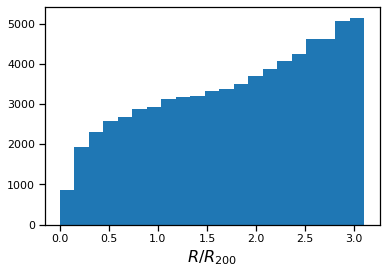

In [112]:
plt.hist(gal['Rn'],bins=21)
plt.xlabel(r'$R/R_{200}$',fontsize=16)

The line of sight velocity
---------------------------------------


Here we compute the line of sight velocity assuming the redshift given by the Yang catalog. For the orbital classification we also need to compute the cluster circular velocity.

In [113]:
def get_los_velocity(z_gal,z_BCG):
    return c_kms*(z_gal - z_BCG)/(1 + z_BCG)

In [114]:
vlos = np.array(get_los_velocity(gal['z'],gal['redshift']))

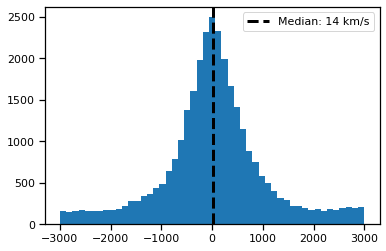

In [115]:
vmask = np.abs(vlos)<=2500.
zm = np.median(vlos[vmask])
_ = plt.hist(vlos,bins=np.linspace(-3000.,3000.))
plt.axvline(zm,ls='--',lw=3,color='k',label='Median: %i km/s'%zm)
plt.legend()

In [116]:
def vcirc(mass,redshift,mdef,cosmo):
    '''Calculate circular velocity in km/s for halos of mass M (Msun/h)'''
    rho_crit = cosmo.critical_density(redshift)
    if mdef[-1] == 'c':
        delta = int(mdef[:-1])
        rho = delta*rho_crit
    elif mdef[-1] == 'm':
        delta = int(mdef[:-1])
        rho = delta*rho_crit*cosmo.Om(redshift)
    else:
        raise RuntimeError("Not correct mass definition")
    v = np.sqrt(G*(np.pi*4*rho/3)**(1./3)*(mass*u.Msun/cosmo.h)**(2./3))
    a = v.to(u.km/u.s)
    return a.value

In [117]:
vc   = vcirc(10**gal['M200'],gal['redshift'],'200c',cosmo)

Text(0.5, 0, '$v_{los}/v_{circ}$')

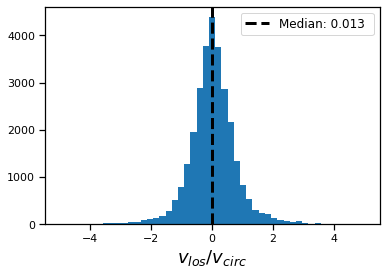

In [118]:
zm = np.median(vlos[vmask]/vc[vmask])

_ = plt.hist(vlos[vmask]/vc[vmask],bins=np.linspace(-5.,5.))
plt.axvline(zm,ls='--',lw=3,color='k',label='Median: %.3f '%zm)
plt.legend(fontsize=12)
plt.xlabel(r'$v_{los}/v_{circ}$',fontsize=18)

In [119]:
gal['vlos'] = vlos
gal['vlosn']= vlos/vc

In [120]:
vlosn = vlos/vc
rnorm = gal['Rn']

cut = np.abs(vlosn)<3.0

In [121]:
## change the r200c to the r200m. 

In [122]:
rcls = np.array(gal['R'])*u.Mpc
rcls = rcls.to(u.km).value

In [123]:
year   = 365*24*3600
to_gyr = year*1e9

In [124]:
tinfall = (rcls/(np.abs(vlos)+1e-9))*u.s.to(u.yr)
# tinfall/= to_gyr

In [125]:
gal['t_infall'] = tinfall

(array([3.000e+00, 1.200e+01, 2.700e+01, 8.400e+01, 2.460e+02, 6.540e+02,
        1.442e+03, 2.922e+03, 4.575e+03, 5.393e+03, 4.949e+03, 3.617e+03,
        2.306e+03, 1.387e+03, 7.870e+02, 4.230e+02, 2.560e+02, 1.600e+02,
        5.800e+01, 4.200e+01]),
 array([ 7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,
         9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25,
        11.5 , 11.75, 12.  ]),
 <BarContainer object of 20 artists>)

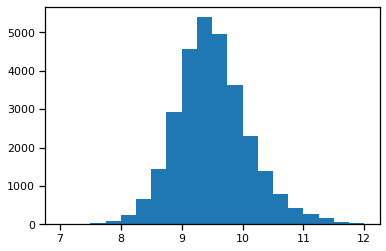

In [126]:
plt.hist(np.log10(tinfall[vmask]),bins=np.linspace(7.,12.,21))

# Orbital Classification
---------------------------------------


Here we assign the classes, orbital, infall and interloper.

In [127]:
from sklearn.ensemble import RandomForestClassifier
import joblib
loaded_rf = joblib.load("/Users/jesteves/Downloads/phase_space/classification_2d_rf.joblib")

/usr/local/anaconda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/anaconda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [128]:
import pandas as pd
df   = pd.DataFrame ({ 'r2d':rnorm, 'vlos':vlosn})
tags = loaded_rf.predict(df) 


In [129]:
tag_probability = loaded_rf.predict_proba(df) 

In [130]:
tag_probability

array([[0.  , 0.55, 0.45],
       [0.  , 0.71, 0.29],
       [0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ]])

In [131]:
def get_random_assignment(prob):
    is_class = np.full(len(prob),0)
    for i,pi in enumerate(prob):
        is_class[i] = int(pi>np.random.random())
    return is_class

In [132]:
porbital= tag_probability[:,0]
pinfall = tag_probability[:,1]
pinterl = tag_probability[:,2]

orbital = get_random_assignment(porbital)
infall  = get_random_assignment(pinfall)
interl  = get_random_assignment(pinterl)

Text(0.5, 0, 'Probability')

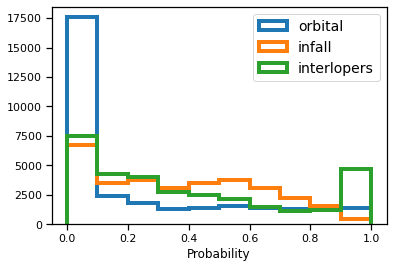

In [133]:
plt.hist(porbital[cut],histtype='step',lw=4,label='orbital')
plt.hist(pinfall[cut],histtype='step',lw=4,label='infall')
plt.hist(pinterl[cut],histtype='step',lw=4,label='interlopers')
plt.legend(fontsize=14)
plt.xlabel('Probability')

In [134]:
# np.count_nonzero(orbital)/len(orbital)
# np.count_nonzero(infall)/len(orbital)
np.count_nonzero(interl)/len(orbital)

0.7309352921386116

In [135]:
gal['infall']     = infall 
gal['orbital']    = orbital
gal['interloper'] = interl

gal['pinfall']     = pinfall 
gal['porbital']    = porbital
gal['pinterloper'] = pinterl

In [136]:
import seaborn as sns
sns.set_context('notebook')

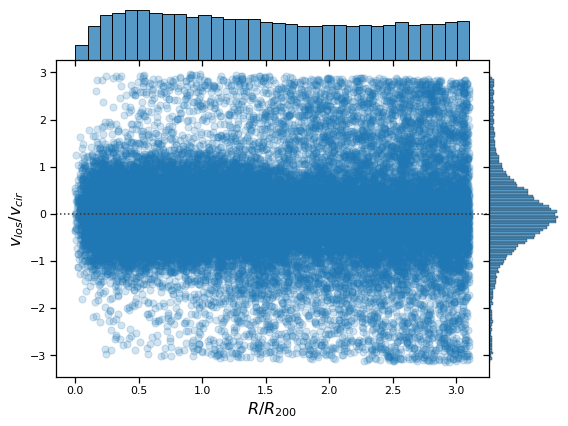

In [137]:
# ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="scatter", s=10, alpha=0.3, space=0)
# ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="resid", space=0, height=6, ratio=6, joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)},ylim=(-1650,1650))
ax = sns.jointplot(x=rnorm[cut], y=vlosn[cut], kind="resid", space=0, height=6, ratio=6, joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)})
ax.set_axis_labels(r'$R/R_{200}$', r'$v_{los}/v_{cir}$ ', fontsize=16)
ax.fig.set_figwidth(8)

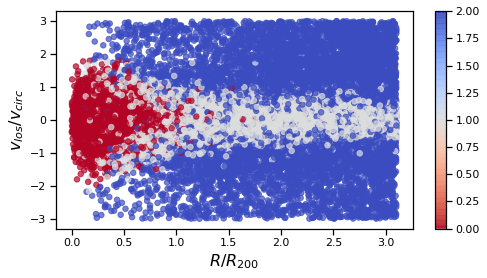

In [138]:
plt.figure(figsize=(8,4))
plt.scatter(rnorm[cut],vlosn[cut],c=tags[cut],alpha=0.7,s=30,cmap='coolwarm_r')
plt.xlabel(r'$R/R_{200}$',fontsize=16)
plt.ylabel(r'$v_{los}/ v_{circ} $',fontsize=16)
plt.colorbar()

# Star Forming Galaxies Classification
--------------

In first approach we assume a fixed threshold on ssfr. Next step would be to model with a linear fit.

In [139]:
star_forming = (gal['ssfr']>-11.0)
quenching    = np.logical_not(star_forming)

In [140]:
gal['SF'] = np.array(star_forming).astype(int)

# Match With Morphological Classification
--------------

Here we math the Dominguez et al. 2017 machine learning morphological classification with our sample.

In [141]:
morp_fname = fl.morp_fname

In [142]:
from astropy.io.fits import getdata
from astropy.table import Table

morph = Table(getdata(morp_fname,1))

In [143]:
!cat ../data/README_Morph_catalogue_DS18.txt

#############################################################################
                          
		Morphological catalogue for SDSS galaxies
                     
			current version: v1.0, Feb 2018

#############################################################################

The morphologies have been obtained by applying Deep Learning models to SDSS-DR7 RGB cutouts, as explained in Dominguez Sánchez+18.

The catalogue contains 670,722 rows, one per galaxy.
The meaning of the columns are  (see also Table 3 from DS+18):

Name                 Meaning

 1  - dr7objid     =  SDSS-DR7 ID
 2  - galcount     =  Meert+15 ID
 3  - P_disk       =  Probability of showing disk/features (vs. being smooth)
 4  - P_edge_on    =  Prob. of being edge-on 
 5  - P_bar_GZ2    =  Prob. of having bar signature (trained with GZ2 catalogue)
 6  - P_bar_Nair10 =  Prob. of having bar signature (trained with Nair+10 catalogue)
 7  - P_merg       =  Prob. of being merger/projected pairs
 8  - P_bulge   

In [144]:
morph

_RAJ2000,_DEJ2000,objID,M15,Pdisk,Pedgeon,PbarGZ2,PbarNair10,Pmerg,Pbulge,Pcigar,TType,PS0,Sloan,_RA,_DE
float64,float64,int64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,str39,float64,float64
236.2469939,-0.4752639,587722952230174996,1,3.54431e-05,0.646749,0.00570267,0.384967,0.0210895,0.00223408,0.992602,3.40424,0.970816,"gref=""SDSS3.dr12.pos,w ${+_RA}+${+_DE}""",236.24699,-0.47526
236.2870031,-0.5180031,587722952230175035,2,0.000726125,0.00519745,0.000318388,0.36079,0.097683,0.000533296,0.999629,3.32452,0.999759,"gref=""SDSS3.dr12.pos,w ${+_RA}+${+_DE}""",236.287,-0.518
236.341995,-0.4670231,587722952230175138,3,0.966147,0.000429604,0.00116753,0.396651,0.0395277,0.27721,0.143814,2.18678,0.995247,"gref=""SDSS3.dr12.pos,w ${+_RA}+${+_DE}""",236.34199,-0.46702
236.3500061,-0.5982369,587722952230175145,4,0.0765286,1.01519e-05,0.00163528,0.344985,0.0518972,0.0616104,0.000899576,1.80833,0.998581,"gref=""SDSS3.dr12.pos,w ${+_RA}+${+_DE}""",236.35001,-0.59824
236.3690031,-0.57445,587722952230175173,5,0.588999,0.053386,0.000710209,0.462225,0.0431297,0.254238,0.974827,2.63448,0.999394,"gref=""SDSS3.dr12.pos,w ${+_RA}+${+_DE}""",236.369,-0.57445
236.3970031,-0.4934569,587722952230240617,6,0.975294,4.54852e-06,0.0670039,0.344379,0.16815,0.149589,0.00124175,3.08055,0.943991,"gref=""SDSS3.dr12.pos,w ${+_RA}+${+_DE}""",236.397,-0.49346
236.4450069,-0.5062869,587722952230240688,7,0.151808,8.55687e-06,0.0091088,0.591967,0.197335,3.11165e-05,0.275521,5.27911,0.998853,"gref=""SDSS3.dr12.pos,w ${+_RA}+${+_DE}""",236.44501,-0.50629
236.5480039,-0.549335,587722952230306064,8,0.279842,0.988545,0.0406824,0.389922,0.0427533,0.0404572,0.999997,3.47491,0.983288,"gref=""SDSS3.dr12.pos,w ${+_RA}+${+_DE}""",236.548,-0.54933
236.6739961,-0.6193569,587722952230371590,9,5.69442e-06,0.261573,0.000164425,0.105626,0.742849,0.820464,0.474056,0.33168,0.89928,"gref=""SDSS3.dr12.pos,w ${+_RA}+${+_DE}""",236.674,-0.61936


In [145]:
#!pip3 install git+https://github.com/esheldon/smatch/

In [146]:
import smatch

nside=4096 # healpix nside
maxmatch=1 # return closest match

# ra,dec,radius in degrees
matches0 = smatch.match(gal['ra'], gal['dec'], 3.0/3600, morph['_RA'], morph['_DE'], nside=nside, maxmatch=maxmatch)
dist = np.sqrt((gal['ra'][matches0['i1']]-morph['_RA'][matches0['i2']])**2+(gal['dec'][matches0['i1']]-morph['_DE'][matches0['i2']])**2)*3600

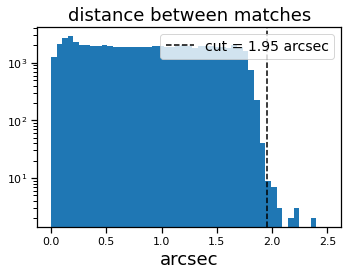

In [147]:
plt.figure(figsize=(5,4))
_ = plt.hist(dist,bins=np.linspace(0.,2.5))
plt.axvline(1.95,ls='--',color='k',label='cut = %.2f arcsec'%(1.95))
plt.yscale('log')
plt.xlabel('arcsec',fontsize=18)
plt.legend(fontsize=14)
plt.title('distance between matches',fontsize=18)
plt.tight_layout()
plt.savefig('../plots/'+'match_distance.png')

In [148]:
matches = smatch.match(gal['ra'], gal['dec'], 2.9/3600, morph['_RA'], morph['_DE'], nside=nside, maxmatch=maxmatch)
dist = np.sqrt((gal['ra'][matches0['i1']]-morph['_RA'][matches0['i2']])**2+(gal['dec'][matches0['i1']]-morph['_DE'][matches0['i2']])**2)*3600

In [149]:
indice1 = matches['i1']
indice2 = matches['i2']
fraction = len(gal[indice1])/len(gal)

print('Fraction matched: %.3f'%fraction)

Fraction matched: 0.981


In [150]:
columns = morph.colnames[4:-3]

print('Selected Columns:',columns)

for col in columns:
    gal[col] = -99.
    gal[col][indice1] = morph[col][indice2]

Selected Columns: ['Pdisk', 'Pedgeon', 'PbarGZ2', 'PbarNair10', 'Pmerg', 'Pbulge', 'Pcigar', 'TType', 'PS0']


# Saving File
---------------------------------------


In [103]:
galaxy_file[:-4]+'_volumeLimited_v1'

'../data/groups_deCarvalho2017_galaxies_final_flag_johnnyheq_volumeLimited_v1'

In [151]:
# fl.gal_fname1 = galaxy_file[:-4]+'_v1.csv'
fl.gal_fname1 = galaxy_file[:-4]+'_volumeLimited_v1'
gal.write(fl.gal_fname1,format='csv',overwrite=True)